In [ ]:
#importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#setting the style for plots
sns.set(style="whitegrid")


In [ ]:
#loading data set from CSV file
df = pd.read_csv('Mall_Customers.csv')
df.head() #displaying few rows ofthe data set


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#exploring data
df.info() #checking data types and null values
df.describe() #getting basic statistics of numerical columns
df.isnull().sum() #checnking for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


<Axes: xlabel='Gender', ylabel='count'>

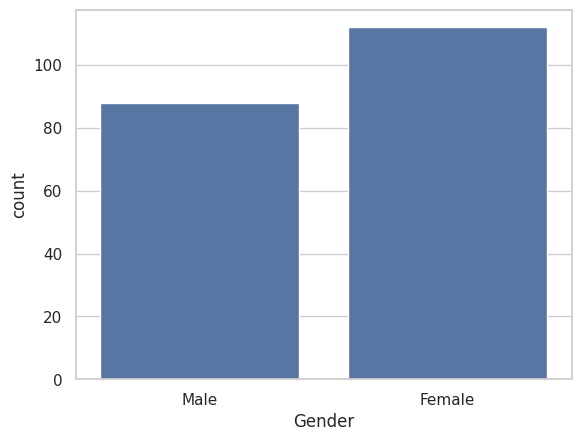

In [ ]:
#renaming columns for ease
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
#plotting number of male and female customers
sns.countplot(x='Gender', data=df)


In [ ]:
#selecting ony the numberical columns we want to use for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
#scaling features to have similar ranges for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


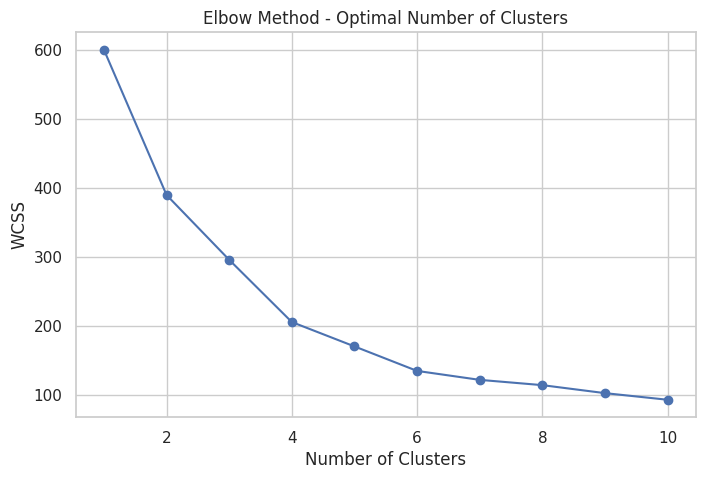

In [ ]:
wcss = []  # lis to store within-Cluster Sum of Squares

for i in range(1, 11): #trying cluster size 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method - Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
#applying kmeans
kmeans = KMeans(n_clusters=5, random_state=42)
#addinf cluster labels to origional dataset
df['Cluster'] = kmeans.fit_predict(X_scaled)
df.head() #updated dataset


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


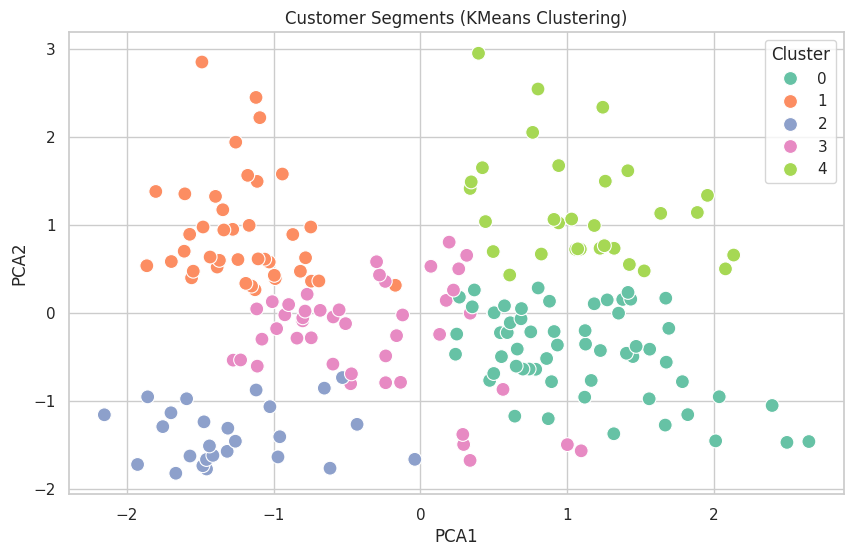

In [ ]:
# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#adding PCA results to dataset
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Ploting using reduced dimensions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2', s=100)
plt.title('Customer Segments (KMeans Clustering)')
plt.show()


In [ ]:
#checking avg age, income and spending score of customers in each cluster
df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,55.275862,47.620690,41.706897
1,32.875000,86.100000,81.525000
2,25.769231,26.115385,74.846154
3,26.733333,54.311111,40.911111
4,44.387097,89.774194,18.483871
